In [401]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [402]:
#Reads data from Melbourne Housing and Poperty Sales of Melbourne City. Sources claim to be scrapped from domain.com
dataset1 = pd.read_csv("datasets/Melbourne_housing_FULL.csv")
dataset2 = pd.read_csv("datasets/PSMS.csv")

In [403]:
#Takes our two datasets and merges them together into one. Then looking at any Null values and deciding how to handle them. 
Merged_Data = pd.merge(dataset1,dataset2,how='outer')
Merged_Data.isnull().sum()
Merged_Data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,KeyID
0,Abbotsford,1 Paterson St,2,h,1075000.0,S,Biggin,14/10/2017,3.0,3067.0,...,0.0,NaN,92.0,1927.0,Yarra City Council,-37.80318,145.00067,Northern Metropolitan,4019.0,NaN
1,Abbotsford,1/1 Mayfield St,3,h,NaN,SP,Nelson,18/03/2017,2.5,3067.0,...,1.0,119.0,167.0,2005.0,Yarra City Council,-37.80820,144.99990,Northern Metropolitan,4019.0,NaN
2,Abbotsford,1/29 Yarra Bank Ct,3,u,1001000.0,S,Biggin,19/08/2017,3.0,3067.0,...,1.0,NaN,NaN,2000.0,Yarra City Council,-37.80468,144.99834,Northern Metropolitan,4019.0,NaN
3,Abbotsford,1/29 Yarra Bank Ct,3,u,1001000.0,S,Biggin,19/08/2017,3.0,3067.0,...,1.0,NaN,NaN,2000.0,NaN,-37.80468,144.99834,Northern Metropolitan,4019.0,21637.0
4,Abbotsford,1/43 Abbotsford St,2,u,505000.0,PI,Nelson,27/05/2017,3.0,3067.0,...,1.0,0.0,38.0,1970.0,Yarra,-37.80206,145.00015,Northern Metropolitan,4019.0,16637.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53248,Yarraville,96 Pentland Pde,3,h,1100000.0,VB,hockingstuart,9/09/2017,6.3,3013.0,...,0.0,221.0,137.0,1948.0,NaN,-37.81284,144.89159,Western Metropolitan,6543.0,20905.0
53249,Yarraville,98 Powell St,4,h,NaN,SP,Greg,7/05/2016,7.0,3013.0,...,2.0,476.0,NaN,NaN,Maribyrnong City Council,-37.82010,144.88430,Western Metropolitan,6543.0,NaN
53250,croydon,81 hull Rd,3,h,730000.0,S,Ray,26/08/2017,23.0,3136.0,...,NaN,NaN,NaN,NaN,Maroondah City Council,NaN,NaN,Eastern Metropolitan,11925.0,NaN
53251,croydon,81 hull Rd,3,h,730000.0,S,Ray,26/08/2017,23.0,3136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,11925.0,23088.0


In [404]:
#Exploring the shape of our initial dataset. Output shows that our intial dataset has 53K rows. Our previous exploration into NaN values shows that a lot of values are missing for our data. 
Merged_Data.shape

(53253, 22)

In [405]:
#Dropping irrellevant columns that we think dont correlate to price. 
#We are doing this now to hopefully thing down the amount of potential NaN values in our dataset which we will remove in the next step.
# Also we will drop any duplicates. This narrows our dataset to 33K values. 
Data = Merged_Data.drop(["Date","Lattitude", "Suburb", "KeyID","Address", "Method", "SellerG","Postcode", "CouncilArea", "YearBuilt"], axis = 1)
Data.drop_duplicates(inplace = True)
Data

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Longtitude,Regionname,Propertycount
0,2,h,1075000.0,3.0,2.0,1.0,0.0,NaN,92.0,145.00067,Northern Metropolitan,4019.0
1,3,h,NaN,2.5,3.0,2.0,1.0,119.0,167.0,144.99990,Northern Metropolitan,4019.0
2,3,u,1001000.0,3.0,3.0,2.0,1.0,NaN,NaN,144.99834,Northern Metropolitan,4019.0
4,2,u,505000.0,3.0,2.0,1.0,1.0,0.0,38.0,145.00015,Northern Metropolitan,4019.0
6,4,t,1525000.0,3.0,4.0,2.0,2.0,102.0,NaN,145.00066,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
53244,3,h,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,6543.0
53245,2,h,820000.0,7.0,2.0,1.0,0.0,211.0,NaN,144.88650,Western Metropolitan,6543.0
53247,3,h,1100000.0,6.3,3.0,1.0,0.0,221.0,137.0,144.89159,Western Metropolitan,6543.0
53249,4,h,NaN,7.0,4.0,1.0,2.0,476.0,NaN,144.88430,Western Metropolitan,6543.0


In [406]:
#We want to drop any Not a number values from our dataset but doing so now will leave us with only 9K values to train our model off. 
# Let's look at where these NaN values are coming from again
Data.isnull().sum()

Rooms                0
Type                 0
Price             6877
Distance             2
Bedroom2          7344
Bathroom          7353
Car               7855
Landsize         10928
BuildingArea     20225
Longtitude        7103
Regionname           4
Propertycount        4
dtype: int64

In [407]:
#Notice 20K values dont have a building area and 10K havent got a landsize. These are definitely correlative to price but we cant use them. 
# We could use the average, but for a dataset like ours the range is much to large and would give us a lot of inaccurate rows. 

#Data.drop(["BuildingArea"], axis='columns', inplace=True)
#Data.isnull().sum()


In [408]:
# Instead lets try and use K-means nearest neighbour method that will fill missing values based on similar rows in the dataset. 
from sklearn.impute import KNNImputer

Missing_Columns = ['Landsize', 'Bedroom2', 'Rooms', 'BuildingArea']
imputer = KNNImputer(n_neighbors=5)
DataSubset = Data[Missing_Columns]
Data_imputed = imputer.fit_transform(DataSubset)
Data_imputed = pd.DataFrame(Data_imputed, columns=Missing_Columns)
Data['BuildingArea'] = Data['BuildingArea'].fillna(Data_imputed['BuildingArea'])



In [409]:
#The good news is that we successfully recovered about 13 thousand values from the BuildingArea column, lets do the other important columns now too. 
Data.isnull().sum()


Rooms                0
Type                 0
Price             6877
Distance             2
Bedroom2          7344
Bathroom          7353
Car               7855
Landsize         10928
BuildingArea      7370
Longtitude        7103
Regionname           4
Propertycount        4
dtype: int64

In [410]:
SimilarFeatures = ['Landsize', 'Bedroom2', 'Rooms', 'BuildingArea']
imputer = KNNImputer(n_neighbors=5)
DataSubset = Data[SimilarFeatures]
Data_imputed = imputer.fit_transform(DataSubset)
Data_imputed = pd.DataFrame(Data_imputed, columns=Missing_Columns)
Data['Landsize'] = Data['Landsize'].fillna(Data_imputed['Landsize'])



In [411]:
# We recovered another 7k values. 
Data.isnull().sum()


Rooms               0
Type                0
Price            6877
Distance            2
Bedroom2         7344
Bathroom         7353
Car              7855
Landsize         3950
BuildingArea     7370
Longtitude       7103
Regionname          4
Propertycount       4
dtype: int64

In [412]:
#Now let's drop the NaN values. By using the K-Nearest method to fill in some missing values we improved the volume of data to train our dataset on. 

Cleaned_data = Data.dropna()
Cleaned_data.shape

(16256, 12)

In [413]:
#We could encode the suburb into a binary format. probably a better way to do this but not sure. Location is surely correlated to price. Perhaps we should use distance to CBD instead?
Cleaned_data = pd.get_dummies(Cleaned_data, columns = ["Regionname"]) 

In [414]:
#Encoding the Type into a binary format. H = house, T = townhouse, U = unit  
Cleaned_data = pd.get_dummies(Cleaned_data, columns = ["Type"])

In [434]:
from sklearn.model_selection import train_test_split
X = Cleaned_data.drop(['Price'], axis = 1)
Y = Cleaned_data['Price']

In [435]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [447]:
#Joining the training data back together. 
training_data = X_train.join(Y_train)

<Axes: >

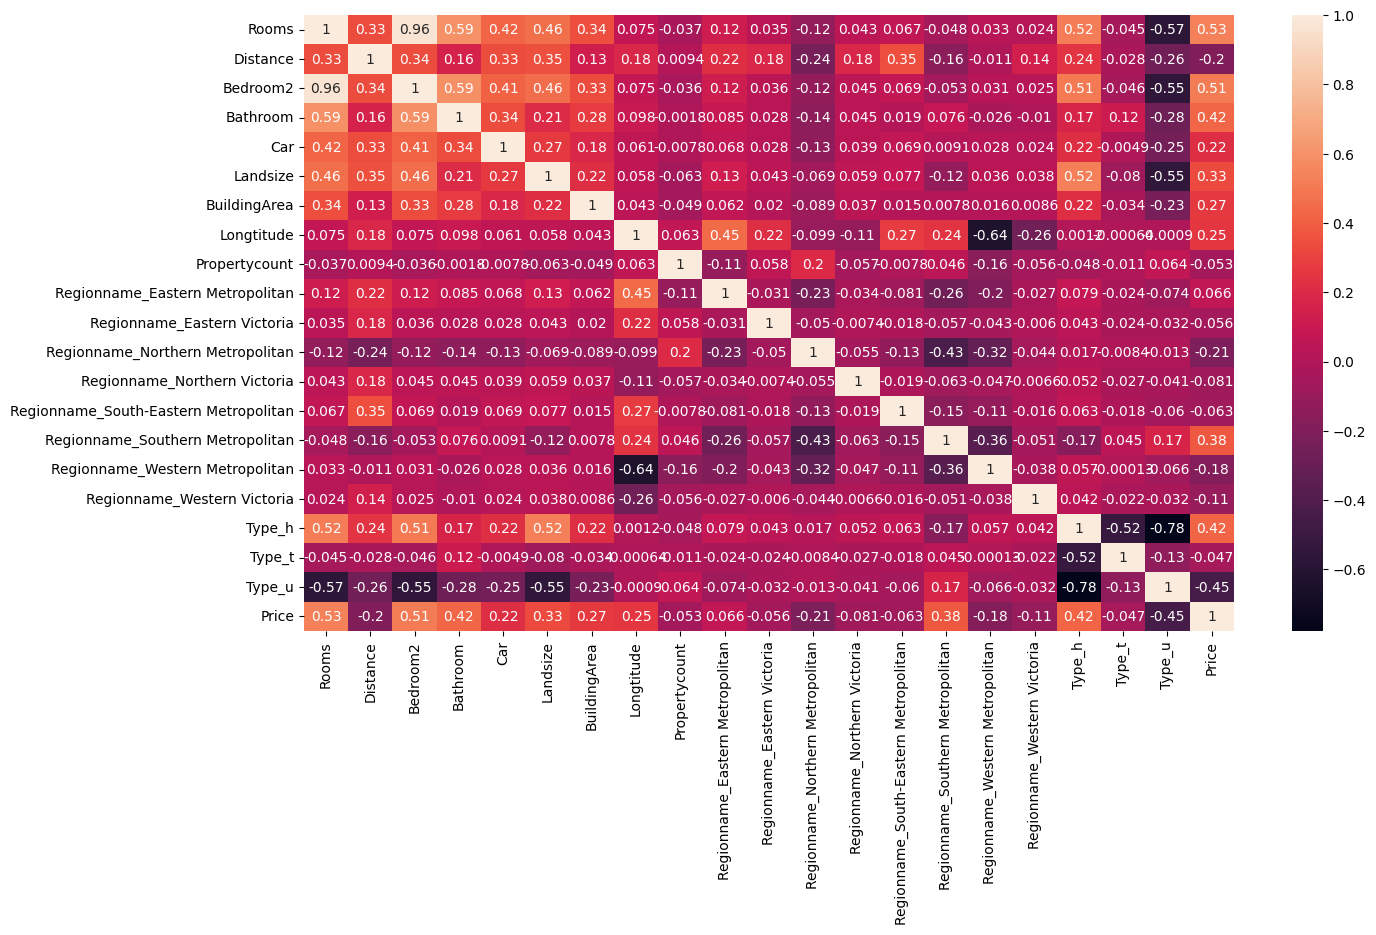

In [448]:
#Lets look at how different variables correlate to price. Seaborn heatmap is a great way to view this.   
plt.figure(figsize = (15,8))
sns.heatmap(training_data.corr(), annot=True)

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Bedroom2'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 2500x1000 with 0 Axes>

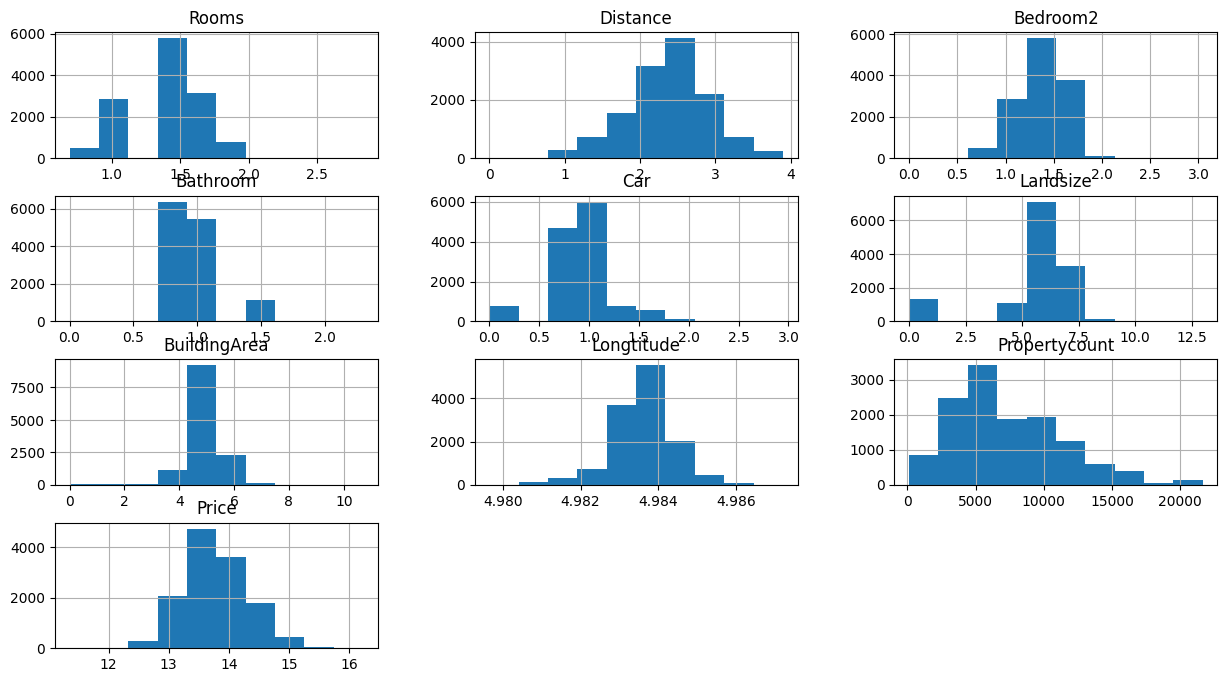

In [449]:
#Features are somewhat skewed, ideally we want a bell curve type distubtion 
plt.figure(figsize=(25,10))
training_data.hist(figsize=(15,8))

In [420]:
#Normalising data using logirithms. 
training_data['Rooms'] = np.log (training_data['Rooms']+1)
training_data['Distance'] = np.log (training_data['Distance']+1)
training_data['Price'] = np.log (training_data['Price']+1)
training_data['Bedroom2'] = np.log (training_data['Bedroom2']+1)
training_data['Landsize'] = np.log (training_data['Landsize']+1)
training_data['BuildingArea'] = np.log (training_data['BuildingArea']+1)
training_data['Longtitude'] = np.log (training_data['Longtitude']+1)
training_data['Car'] = np.log (training_data['Car']+1)
training_data['Bathroom'] = np.log (training_data['Bathroom']+1)




array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Bedroom2'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

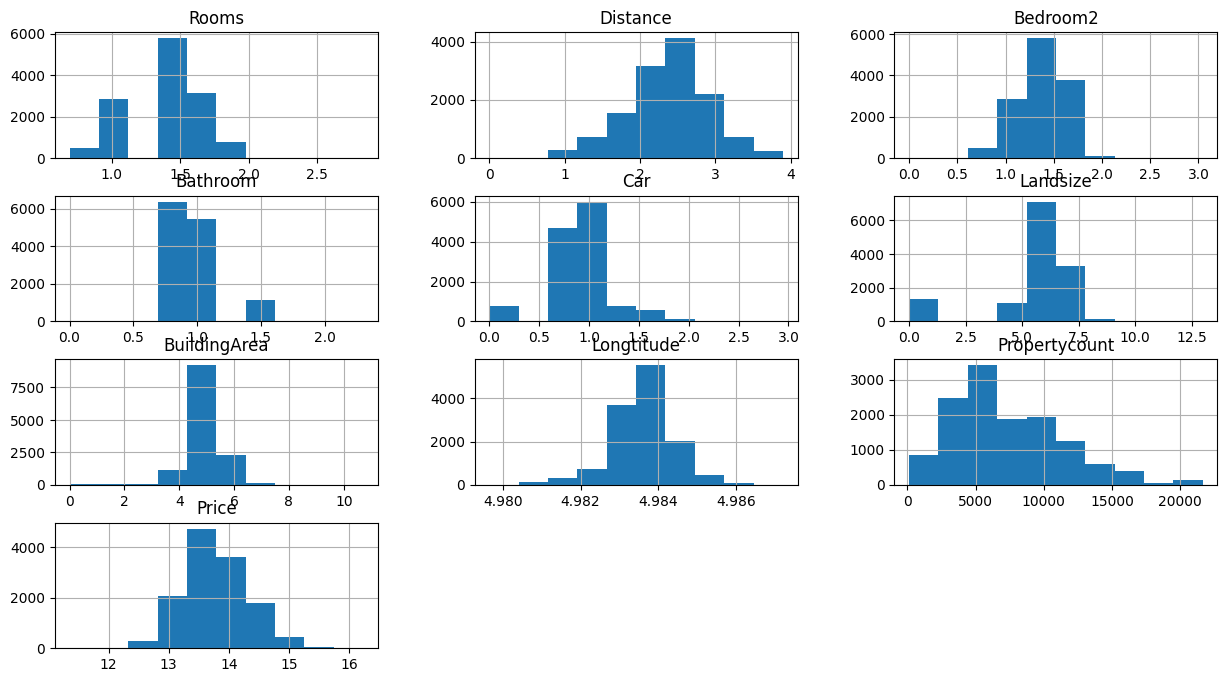

In [439]:
#Showing data after normalising with logarithms. 
training_data.hist(figsize=(15,8))

In [440]:
#Simple Linear Regression model, scaling our training data too. Then lastly fitting training data to line. 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
regression_model = LinearRegression()
scaler = StandardScaler()
X_train_s= scaler.fit_transform(X_train)
regression_model.fit(X_train_s,Y_train)

LinearRegression()

In [423]:
#Normalising our test data using logarithms. 
test_data = X_test.join(Y_test)

test_data['Rooms'] = np.log (test_data['Rooms']+1)
test_data['Distance'] = np.log (test_data['Distance']+1)
test_data['Price'] = np.log (test_data['Price']+1)
test_data['Bedroom2'] = np.log (test_data['Bedroom2']+1)
test_data['Landsize'] = np.log (test_data['Landsize']+1)
test_data['BuildingArea'] = np.log (test_data['BuildingArea']+1)
test_data['Landsize'] = np.log (test_data['Landsize']+1)
test_data['Car'] = np.log (test_data['Car']+1)
test_data['Bathroom'] = np.log (test_data['Bathroom']+1)

In [441]:
X_test_s = scaler.transform(X_test)

In [442]:
#Testing performance of the model. Firestly evaluating teh r^2 value. 
regression_model.score(X_test_s,Y_test)

0.7448194729284479

In [443]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, Y_train)

RandomForestRegressor()

In [446]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#prediction = forest.predict(X_test)
#accuracy = accuracy_score(Y_test, prediction)
#precision = precision_score(Y_test, prediction, average='weighted')
#recall = recall_score(Y_test, prediction, average='weighted')
#f1 = f1_score(Y_test, prediction, average='weighted')
           
#print("The accuracy of the model is: " + str(accuracy))
#print("The precision of the model is: " + str(precision))
#print("The recall of the model is: " + str(recall))
#print("The f1 of the model is: " + str(f1))
print(forest.score(X_test_s,Y_test))

0.8523491357521125


In [330]:
from sklearn.model_selection import GridSearchCV

grid = {
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8],
}

grid_search = GridSearchCV(forest,grid, cv = 5,
                           return_train_score= True,
                           scoring="neg_mean_squared_error")

grid_search.fit(X_train_s, Y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [331]:
best_forest = grid_search.best_estimator_
best_forest.score(X_test_s, Y_test)

0.7619751729009798